Name: saiful islam  Id:170104146

***Import Drive ***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***import library***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

***Read the Data_k_mean  file***

In [30]:

df = pd.read_csv('/content/drive/MyDrive/pattern lab/data_k_mean.txt', sep = ' ', header = None)
df
data = df.to_numpy()
print(data)


[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]


***Plotting all data points***

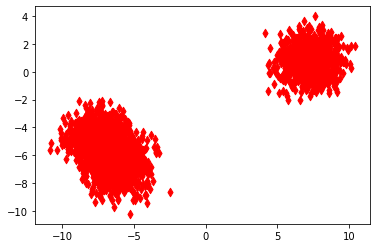

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df[0], df[1], c = 'red', marker = 'd')
plt.show()

***Taking the input k from user***

In [33]:
k = int(input("Enter the value of k : "))

Enter the value of k : 2


***Random centroids for first iteration***

In [34]:
import numpy as np
np.random.seed(seed=10)
random_numbers = np.random.randint(low=0, high=len(data), size=(k,))
centroids = [data[random_numbers[i]] for i in range(k)]
print(centroids)

[array([-6.41775, -6.87142]), array([8.28839, 1.25517])]


***Calculating the Euclidean Distance***

In [35]:
distance = [] #to store the distance from point to classes
index_clusters = [-1 for i in range(len(data))] #to store class corresponding to index
count = 0 #to count the iteration number
clusters = {} #to store class numbers as keys and data points as values
# max 200 iterations
for x in range(500):
    count = x
    # flag to keep track whether change occurs or not
    flag = 0 
    for y in range(k):
        clusters[y] = []
    # iterate through each data points
    for i in range(len(data)):
        distance = []
        
        for j in range(k):
            dist = np.sqrt(pow(abs((data[i][0] - centroids[j][0])), 2) + pow(abs((data[i][1] - centroids[j][1])), 2))
            distance.append(dist)
            #print(distance)
        index = distance.index(min(distance))
        #print(index)
        # check whether the change occurs or not
        if index_clusters[i] != index:
            flag = 1
            index_clusters[i] = index
        clusters[index].append(data[i])
    # if change occurs
    if flag == 0:
        break
    # calculating new centroids
    centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

***Variables to plot class 1 and class 2 data points***

In [38]:
a1 = np.asarray(clusters[0])[:, 0]
b1 = np.asarray(clusters[0])[:, 1]


a2 = np.asarray(clusters[1])[:, 0]
b2 = np.asarray(clusters[1])[:, 1]

***plotting classified data points of two classes with different colored marker***

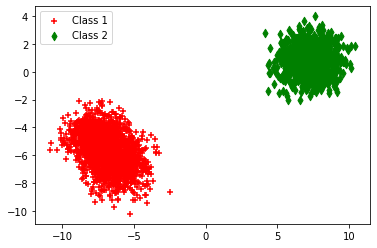

In [41]:

plt.scatter(a1, b1, c = 'red', marker = '+', label = 'Class 1')
plt.scatter(a2, b2, c = 'green', marker = 'd', label = 'Class 2')
plt.legend(loc = 'best')
plt.show()